<a href="https://colab.research.google.com/github/cepdnaclk/e19-4yp-NursingVR-WoundCareAI/blob/kavindu%2Fexperiments%2Fchat-model/chat-model-experiments/llama-experiments/Getting_to_know_Llama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

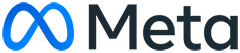

# **Getting to know Llama 3.1: Everything you need to start building**
Our goal in this session is to provide a guided tour of Llama 3.1 with comparison with Llama 2, including understanding different Llama 3.1 models, how and where to access them, Generative AI and Chatbot architectures, prompt engineering, RAG (Retrieval Augmented Generation), Fine-tuning and more. All this is implemented with a starter code for you to take it and use it in your Llama 3.1 projects.

### **0 - Prerequisites**
* Basic understanding of Large Language Models
* Basic understanding of Python

In [1]:
!pip install matplotlib ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00


In [2]:
# presentation layer code

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

def genai_app_arch():
  mm("""
  flowchart TD
    A[Users] --> B(Applications e.g. mobile, web)
    B --> |Hosted API|C(Platforms e.g. Custom, HuggingFace, Replicate)
    B -- optional --> E(Frameworks e.g. LangChain)
    C-->|User Input|D[Llama 3]
    D-->|Model Output|C
    E --> C
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def rag_arch():
  mm("""
  flowchart TD
    A[User Prompts] --> B(Frameworks e.g. LangChain)
    B <--> |Database, Docs, XLS|C[fa:fa-database External Data]
    B -->|API|D[Llama 3]
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama2_family():
  mm("""
  graph LR;
      llama-2 --> llama-2-7b
      llama-2 --> llama-2-13b
      llama-2 --> llama-2-70b
      llama-2-7b --> llama-2-7b-chat
      llama-2-13b --> llama-2-13b-chat
      llama-2-70b --> llama-2-70b-chat
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama3_family():
  mm("""
  graph LR;
      llama-3 --> llama-3-8b
      llama-3 --> llama-3-70b
      llama-3-8b --> llama-3-8b
      llama-3-8b --> llama-3-8b-instruct
      llama-3-70b --> llama-3-70b
      llama-3-70b --> llama-3-70b-instruct
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama3_1_family():
  mm("""
  graph LR;
      llama-3-1 --> llama-3-8b
      llama-3-1 --> llama-3-70b
      llama-3-1 --> llama-3-4050b
      llama-3-1-8b --> llama-3-1-8b
      llama-3-1-8b --> llama-3-1-8b-instruct
      llama-3-1-70b --> llama-3-1-70b
      llama-3-1-70b --> llama-3-1-70b-instruct
      llama-3-1-405b --> llama-3-1-405b-instruct
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

import ipywidgets as widgets
from IPython.display import display, Markdown

# Create a text widget
API_KEY = widgets.Password(
    value='',
    placeholder='',
    description='API_KEY:',
    disabled=False
)

def md(t):
  display(Markdown(t))

def bot_arch():
  mm("""
  graph LR;
  user --> prompt
  prompt --> i_safety
  i_safety --> context
  context --> Llama_3
  Llama_3 --> output
  output --> o_safety
  i_safety --> memory
  o_safety --> memory
  memory --> context
  o_safety --> user
  classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def fine_tuned_arch():
  mm("""
  graph LR;
      Custom_Dataset --> Pre-trained_Llama
      Pre-trained_Llama --> Fine-tuned_Llama
      Fine-tuned_Llama --> RLHF
      RLHF --> |Loss:Cross-Entropy|Fine-tuned_Llama
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def load_data_faiss_arch():
  mm("""
  graph LR;
      documents --> textsplitter
      textsplitter --> embeddings
      embeddings --> vectorstore
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def mem_context():
  mm("""
      graph LR
      context(text)
      user_prompt --> context
      instruction --> context
      examples --> context
      memory --> context
      context --> tokenizer
      tokenizer --> embeddings
      embeddings --> LLM
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)


### **1 - Understanding Llama 3.1**

### **1.1 - What is Llama 3.1?**

* State of the art (SOTA), Open Source LLM
* 8B, 70B, 405B - base and instruct models
* Choosing model: Size, Quality, Cost, Speed
* Pretrained + Chat
* [Meta Llama 3.1 Blog](https://ai.meta.com/blog/meta-llama-3-1/)
* [Getting Started with Meta Llama](https://llama.meta.com/docs/get-started)

In [3]:
llama2_family()

In [4]:
llama3_family()

In [5]:
llama3_1_family()

### **1.2 - Accessing Llama 3.1**
* Download + Self Host (i.e. [download Llama](https://ai.meta.com/resources/models-and-libraries/llama-downloads))
* Hosted API Platform (e.g. [Groq](https://console.groq.com/), [Replicate](https://replicate.com/meta/meta-llama-3-8b-instruct), [Together](https://api.together.xyz/playground/language/meta-llama/Llama-3-8b-hf), [Anyscale](https://app.endpoints.anyscale.com/playground))

* Hosted Container Platform (e.g. [Azure](https://techcommunity.microsoft.com/t5/ai-machine-learning-blog/introducing-llama-2-on-azure/ba-p/3881233), [AWS](https://aws.amazon.com/blogs/machine-learning/llama-2-foundation-models-from-meta-are-now-available-in-amazon-sagemaker-jumpstart/), [GCP](https://console.cloud.google.com/vertex-ai/publishers/google/model-garden/139))



### **1.3 - Use Cases of Llama 3.1**
* Content Generation
* Summarization
* General Chatbots
* RAG (Retrieval Augmented Generation): Chat about Your Own Data
* Fine-tuning
* Agents

## **2 - Using and Comparing Llama 3 and Llama 2**

We will be using Llama 2 7b & 70b chat and Llama 3 8b & 70b instruct models hosted on [Replicate](https://replicate.com/search?query=llama) to run the examples here. You will need to first sign in with Replicate with your github account, then create a free API token [here](https://replicate.com/account/api-tokens) that you can use for a while. You can also use other Llama 3 cloud providers such as [Groq](https://console.groq.com/), [Together](https://api.together.xyz/playground/language/meta-llama/Llama-3-8b-hf), or [Anyscale](https://app.endpoints.anyscale.com/playground).


### **2.1 - Install dependencies**

In [6]:
!pip install replicate
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.1 MB/s eta 0:00:00


### **2.2 - Create helpers for Llama 2 and Llama 3**
First, set your Replicate API token as environment variables.


In [7]:
import os
from getpass import getpass

from google.colab import userdata


# REPLICATE_API_TOKEN = getpass()

GROQ_API_TOKEN = userdata.get('GROQ')

# os.environ["REPLICATE_API_TOKEN"] = GROQ_API_TOKEN

print(GROQ_API_TOKEN)

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


Create Llama 2 and Llama 3 helper functions - for chatbot type of apps, we'll use Llama 3 instruct and Llama 2 chat models, not the base models.

In [8]:
import replicate
from groq import Groq

client = Groq(
    api_key=GROQ_API_TOKEN

)

def llama3_8b_groq(prompt):
    chat_completion = client.chat.completions.create(
      messages=[
          {
              "role": "user",
              "content": prompt,
          }
      ],
      model="llama3-8b-8192",
    )

    return chat_completion.choices[0].message.content


def llama3_70b_groq(prompt):
    chat_completion = client.chat.completions.create(
      messages=[
          {
              "role": "user",
              "content": prompt,
          }
      ],
      model="llama3-70b-8192",
    )

    return chat_completion.choices[0].message.content


def llama3_8b(prompt):
    chat_completion = client.chat.completions.create(
      messages=[
          {
              "role": "user",
              "content": prompt,
          }
      ],
      model="llama3-8b-8192",
    )

    return chat_completion.choices[0].message.content


def llama3_70b(prompt):
    chat_completion = client.chat.completions.create(
      messages=[
          {
              "role": "user",
              "content": prompt,
          }
      ],
      model="llama3-70b-8192",
    )

    return chat_completion.choices[0].message.content

#####################################

# def llama2_7b(prompt):
#     output = replicate.run(
#       "meta/llama-2-7b-chat",
#       input={"prompt": prompt}
#     )
#     return ''.join(output)

# def llama2_70b(prompt):
#     output = replicate.run(
#       "meta/llama-2-70b-chat",
#       input={"prompt": prompt}
#     )
#     return ''.join(output)

# def llama3_8b(prompt):
#     output = replicate.run(
#       "meta/meta-llama-3-8b-instruct",
#       input={"prompt": prompt}
#     )
#     return ''.join(output)

# def llama3_70b(prompt):
#     output = replicate.run(
#       "meta/meta-llama-3-70b-instruct",
#       input={"prompt": prompt}
#     )
#     return ''.join(output)

#####################################

### **2.3 - Basic QA with Llama 2 and 3**

In [9]:
prompt = "What is the color of llama? answer me in one word."
output = llama3_8b_groq(prompt)
print(output)

prompt = "Why is that"
output = llama3_8b_groq(prompt)
print(output)
# output = llama3_70b_groq(prompt)
# print(output)

Brown.
I'm happy to help! However, I need a bit more context from you. Could you please complete the sentence "Why is that..." with a question or a statement that you're wondering about? I'll do my best to provide a thoughtful response!


In [10]:
prompt = "What is the color of llama? answer me in one word."
output = llama3_70b_groq(prompt)
print(output)


Brown.


In [11]:
# output = llama3_8b(prompt)
# md(output)

In [12]:
# output = llama2_7b("The typical color of a llama is what? Answer in one word.")
# md(output)

In [13]:
# output = llama3_8b("The typical color of a llama is what? Answer in one word.")
# md(output)

**Note: Llama 3 follows instructions better than Llama 2 in single-turn chat.**

## **3 - Chat conversation**

### **3.1 - Single-turn chat**

In [14]:
prompt_chat = "What is the average lifespan of a Llama? Answer the question in few words."
output = llama3_8b_groq(prompt_chat)
md(output)

12-20 years.

In [15]:
output = llama3_70b_groq(prompt_chat)
md(output)

20-30 years.

In [16]:
# example without previous context. LLM's are stateless and cannot understand "they" without previous context
prompt_chat = "What animal family are they? Answer the question in few words."
output = llama3_8b_groq(prompt_chat)
md(output)

I'm happy to help!

In [17]:
prompt_chat = "What animal family are they? Answer the question in few words."
output = llama3_70b_groq(prompt_chat)
md(output)

I'm happy to help! However, I don't see a specific animal mentioned in your question. Could you please clarify or provide more context about which animal you'd like to know the family of?

**Note: Llama 3 70b doesn't hallucinate.**

### **3.2 - Multi-turn chat**
Chat app requires us to send in previous context to LLM to get in valid responses. Below is an example of Multi-turn chat.

In [18]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: 15-20 years.
User: What animal family are they?
"""
output = llama3_8b_groq(prompt_chat)
md(output)

Llamas belong to the camelid family, which also includes camels and alpacas.

In [19]:
output = llama3_70b_groq(prompt_chat)
md(output)

Llamas belong to the camelid family, which includes camels, alpacas, guanacos, and vicuñas.

**Note: Llama 2 and 3 both behave well for using the chat history for follow up questions.**

### **3.3 - Multi-turn chat with more instruction**
Adding the instructon "Answer the question with one word" to see the difference of Llama 2 and 3.

In [20]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: Sure! The average lifespan of a llama is around 20-30 years.
User: What animal family are they?

Answer the question with one word.
"""
output = llama3_8b_groq(prompt_chat)
md(output)

Camlidae.

In [21]:
output = llama3_70b_groq(prompt_chat)
md(output)

Camelid

**Both Llama 3 8b and Llama 2 70b follows instructions (e.g. "Answer the question with one word") better than Llama 2 7b in multi-turn chat.**

### **4.2 - Prompt Engineering**
* Prompt engineering refers to the science of designing effective prompts to get desired responses

* Helps reduce hallucination


#### **4.2.1 - In-Context Learning (e.g. Zero-shot, Few-shot)**
 * In-context learning - specific method of prompt engineering where demonstration of task are provided as part of prompt.
  1. Zero-shot learning - model is performing tasks without any
input examples.
  2. Few or “N-Shot” Learning - model is performing and behaving based on input examples in user's prompt.

In [22]:
# Zero-shot example. To get positive/negative/neutral sentiment, we need to give examples in the prompt
prompt = '''
Classify: I saw a Gecko.
Sentiment: ?

Give one word response.
'''
output = llama3_8b(prompt)
md(output)

Interesting

In [23]:
output = llama3_70b(prompt)
md(output)

Neutral.

**Note: Llama 3 has different opinions than Llama 2.**

In [24]:
# By giving examples to Llama, it understands the expected output format.

prompt = '''
Classify: I love Llamas!
Sentiment: Positive
Classify: I dont like Snakes.
Sentiment: Negative
Classify: I saw a Gecko.
Sentiment:

Give one word response.
'''

output = llama3_8b(prompt)
md(output)

Neutral

In [25]:
output = llama3_70b(prompt)
md(output)

Neutral

**Note: Llama 2, with few shots, has the same output "Neutral" as Llama 3, but Llama 2 doesn't follow instructions (Give one word response) well.**

#### **4.2.2 - Chain of Thought**
"Chain of thought" enables complex reasoning through logical step by step thinking and generates meaningful and contextually relevant responses.

In [26]:
# Standard prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls.
How many tennis balls does Llama have?

Answer in one word.
'''

output = llama3_8b(prompt)
md(output)

Seven.

In [27]:
output = llama3_70b(prompt)
md(output)

Eleven.

**Note: Llama 3-8b did not get the right answer because it was asked to answer in one word.**

In [51]:
# By default, Llama 3 models follow "Chain-Of-Thought" prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls.
How many tennis balls does Llama have?
'''

output = llama3_8b(prompt)
md(output)

Let's count the tennis balls!

Llama started with 5 tennis balls.

Then, it buys 2 more cans of tennis balls, and each can has 3 tennis balls. So, the total number of additional tennis balls is:

2 cans x 3 tennis balls/can = 6 tennis balls

Add these 6 tennis balls to the initial 5 tennis balls:

5 (initial) + 6 (additional) = 11 tennis balls

Llama now has 11 tennis balls!

In [29]:
output = llama3_70b(prompt)
md(output)

Llama started with 5 tennis balls. It bought 2 more cans of tennis balls. Each can has 3 tennis balls. So it has 2 * 3 = 6 more tennis balls. So it has 5 + 6 = 11 tennis balls.
#### 11

**Note: By default, Llama 3 models identify word problems and solves it step by step!**

In [30]:
prompt = """
15 of us want to go to a restaurant.
Two of them have cars
Each car can seat 5 people.
Two of us have motorcycles.
Each motorcycle can fit 2 people.
Can we all get to the restaurant by car or motorcycle?
Think step by step.
Provide the answer as a single yes/no answer first.
Then explain each intermediate step.
"""
output = llama3_8b(prompt)
print(output)

**Yes**

Here are the intermediate steps:

1. We have 15 people who want to go to the restaurant. We have a total of 2 cars and 2 motorcycles.
2. Each car can seat 5 people, so the total number of people that can be transported by car is 2 x 5 = 10. However, we have 15 people, so not all of them can go by car.
3. We have 3 people left who can't fit in the cars. Now we have to think about the motorcycles. Each motorcycle can fit 2 people.
4. We can fit 2 people on each motorcycle, so we can transport 2 x 2 = 4 people by motorcycle.
5. We still have 3 people left who can't fit in either the cars or motorcycles. This is a problem, as we can't transport all 15 people.

Now, let's count the number of people who can be transported:

* Cars: 10 people (2 cars x 5 people each)
* Motorcycles: 4 people (2 motorcycles x 2 people each)
* Total: 10 + 4 = 14 people

As we started with 15 people, we can't transport all of them. However, we can transport 14 of them, which means that 1 person will have

In [31]:
output = llama3_70b(prompt)
print(output)

**YES**

Here are the intermediate steps:

1. Let's start with the cars. Each car can seat 5 people, so two cars can seat 2 x 5 = 10 people.
2. This means 10 out of 15 people can be transported by cars, leaving 15 - 10 = 5 people remaining.
3. Now, let's look at the motorcycles. Each motorcycle can fit 2 people, so two motorcycles can fit 2 x 2 = 4 people.
4. We still have 5 people remaining, but the motorcycles can only fit 4 more people. This means we can transport 4 more people by motorcycle, leaving 1 person remaining.
5. Since there's only 1 person remaining, and no more vehicles, we might think we're stuck. However, we already have 10 people transported by cars, and 4 people transported by motorcycles, which adds up to 10 + 4 = 14 people.
6. This leaves only 1 person remaining, which means we can actually fit that last person in one of the cars (or motorcycles) that already have space.
7. Therefore, we can transport all 15 people to the restaurant using the available vehicles.


**Note: Llama 3 70b model works correctly in this example.**

**Summary: Llama 2 often needs encouragement for step by step thinking to correctly reasoning. Llama 3 understands, reasons and explains better, making chain of thought unnecessary in the cases above.**

### **4.3 - Retrieval Augmented Generation (RAG)**
* Prompt Eng Limitations - Knowledge cutoff & lack of specialized data

* Retrieval Augmented Generation(RAG) allows us to retrieve snippets of information from external data sources and augment it to the user's prompt to get tailored responses from Llama 2.

For our demo, we are going to download an external PDF file from a URL and query against the content in the pdf file to get contextually relevant information back with the help of Llama!





In [32]:
rag_arch()

#### **4.3.1 - LangChain**
LangChain is a framework that helps make it easier to implement RAG.

In [33]:
!pip install langchain
!pip install langchain-community
!pip install sentence-transformers
!pip install faiss-cpu
!pip install bs4
!pip install langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/

#### **4.3.2 - LangChain Q&A Retriever**
* ConversationalRetrievalChain

* Query the Source documents


In [60]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
import bs4

# Step 1: Load the document from a web url
loader = WebBaseLoader(["https://huggingface.co/blog/llama31"])
documents = loader.load()

# Step 2: Split the document into chunks with a specified chunk size
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
all_splits = text_splitter.split_documents(documents)

# Step 3: Store the document into a vector store with a specific embedding model
vectorstore = FAISS.from_documents(all_splits, HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))

You'll need to first sign in at [Groq](https://console.groq.com/login) with your github or gmail account, then get an API token to try Groq out for free.

In [61]:
import os
from getpass import getpass
from google.colab import userdata

GROQ_API_TOKEN = userdata.get('GROQ')

os.environ["GROQ_API_KEY"] = GROQ_API_TOKEN

In [68]:
from langchain_groq import ChatGroq
llm = ChatGroq(temperature=0, model_name="llama3-8b-8192")

In [69]:
from langchain.chains import ConversationalRetrievalChain

# Query against your own data
chain = ConversationalRetrievalChain.from_llm(llm,
                                              vectorstore.as_retriever(),
                                              return_source_documents=True)

# no chat history passed
result = chain({"question": "What is custom tool calling?", "chat_history": []})
md(result['answer'])

print("\nRetrieved Chunks:")
for i, doc in enumerate(result['source_documents']):
    print(f"Chunk {i+1}:\n", doc.page_content)


{"name": "custom_tool_calling", "parameters": {"prompt": "Given the following functions, please respond with a JSON for a function call with its proper arguments that best answers the given prompt.\nRespond in the format {\"name\": function name, \"parameters\": dictionary of argument name and its value}. Do not use variables.\nCustom Tool calling\n\nLlama 3.1 Instruct supports custom function calls from a single user message. The following prompts provide an example of how custom functions can be called from the output of the model. In custom function calling, the model outputs  instead of <|eom_id|>. The system prompt needs to be adjusted to inform the model how to deal with function call outputs.\nCustom Tool Calling JSON Functions"}}


Retrieved Chunks:
Chunk 1:
 You are a helpful assistant with tool calling capabilities. When you receive a tool call response, use the output to format an answer to the orginal user question.<|eot_id|><|start_header_id|>user<|end_header_id|>

Given the following functions, please respond with a JSON for a function call with its proper arguments that best answers the given prompt.

Respond in the format {"name": function name, "parameters": dictionary of argument name and its value}. Do not use variables.
Chunk 2:
 Custom Tool calling
	

Llama 3.1 Instruct supports custom function calls from a single user message. The following prompts provide an example of how custom functions can be called from the output of the model. In custom function calling, the model outputs <|eot_id|> instead of <|eom_id|>. The system prompt needs to be adjusted to inform the model how to deal with function call outputs.

Custom Tool Calling JSON Functions
<|begin_of_text|><|start_header_id|>system<|end_header

In [ ]:
# This time your previous question and answer will be included as a chat history which will enable the ability
# to ask follow up questions.
query = "What two sizes?"
chat_history = [(query, result["answer"])]
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])

## **5 - Fine-Tuning Models**

* Limitatons of Prompt Eng and RAG
* Fine-Tuning Arch
* Types (PEFT, LoRA, QLoRA)
* Using PyTorch for Pre-Training & Fine-Tuning

* Evals + Quality

Examples of Fine-Tuning:
* [Meta Llama Recipes](https://github.com/meta-llama/llama-recipes/tree/main/recipes/finetuning)
* [Hugging Face fine-tuning with Llama 3](https://huggingface.co/blog/llama3#fine-tuning-with-%F0%9F%A4%97-trl)


## **6 - Responsible AI**

* Power + Responsibility
* Hallucinations
* Input & Output Safety
* Red-teaming (simulating real-world cyber attackers)
* [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)



## **7 - Conclusion**
* Active research on LLMs and Llama
* Leverage the power of Llama and its open community
* Safety and responsible use is paramount!

* Call-To-Action
  * [Replicate Free Credits](https://replicate.fyi/connect2023) for Connect attendees!
  * This notebook is available through Llama Github recipes
  * Use Llama in your projects and give us feedback


#### **Resources**
- [Meta Llama 3.1 Blog](https://ai.meta.com/blog/meta-llama-3-1/)
- [Getting Started with Meta Llama](https://llama.meta.com/docs/get-started)
- [Llama 3 repo](https://github.com/meta-llama/llama3)
- [Llama 3 model card](https://github.com/meta-llama/llama3/blob/main/MODEL_CARD.md)
- [LLama 3 Recipes repo](https://github.com/meta-llama/llama-recipes)
- [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)
- [Acceptable Use Policy](https://ai.meta.com/llama/use-policy/)

